In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-methodlines-auto)

We set up the semidiscretization and initial condition in $x$ just as before.

In [2]:
m = 100
x, Dx, Dxx = FNC.diffper(m, [0, 1])
u0 = exp(-60 * (x - 0.5) ** 2)

Now, however, we apply a standard solver using `solve_ivp` to the initial-value problem $\mathbf{u}'=\mathbf{D}_{xx}\mathbf{u}$.

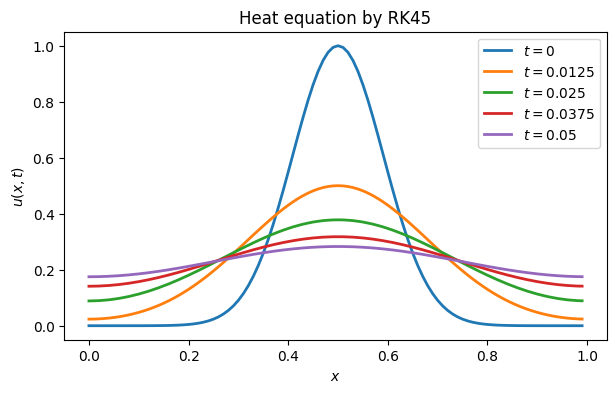

In [3]:
from scipy.integrate import solve_ivp
tfinal = 0.05
f = lambda t, u: Dxx @ u
sol = solve_ivp(f, [0, tfinal], u0, method="RK45", dense_output=True)

t = linspace(0, 0.05, 5)
plot(x, sol.sol(t))
xlabel("$x$"),  ylabel("$u(x,t)$")
legend([f"$t={tj:.4g}$" for tj in t])
title("Heat equation by RK45");

The solution appears to be correct. But the number of time steps that were selected automatically is surprisingly large, considering how smoothly the solution changes.

In [4]:
print(f"RK45 took {len(sol.t) - 1} steps")

RK45 took 602 steps


Now we apply a different solver called `BDF`.

In [5]:
sol = solve_ivp(f, [0, tfinal], u0, method="BDF")
print(f"BDF took {len(sol.t) - 1} steps")

BDF took 34 steps


The number of steps selected was reduced by a factor of 20!